In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import BisectingKMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cars_clus.csv')

print("Dataset loaded successfully!")
print("Columns in dataset:", df.columns.tolist(), "\n")

Dataset loaded successfully!
Columns in dataset: ['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales', 'partition'] 



In [4]:
# Drop rows with missing values
df = df.dropna()

# Select only numeric features for clustering (avoid brand/model names)
X = df.select_dtypes(include=['int64', 'float64'])

if X.empty:
    raise ValueError("No numeric columns found for clustering. Please check your dataset.")

print("Numeric columns used for clustering:", X.columns.tolist(), "\n")

Numeric columns used for clustering: ['partition'] 



In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.12/dist-packages/scipy/cluster/hierarchy.py:2947: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


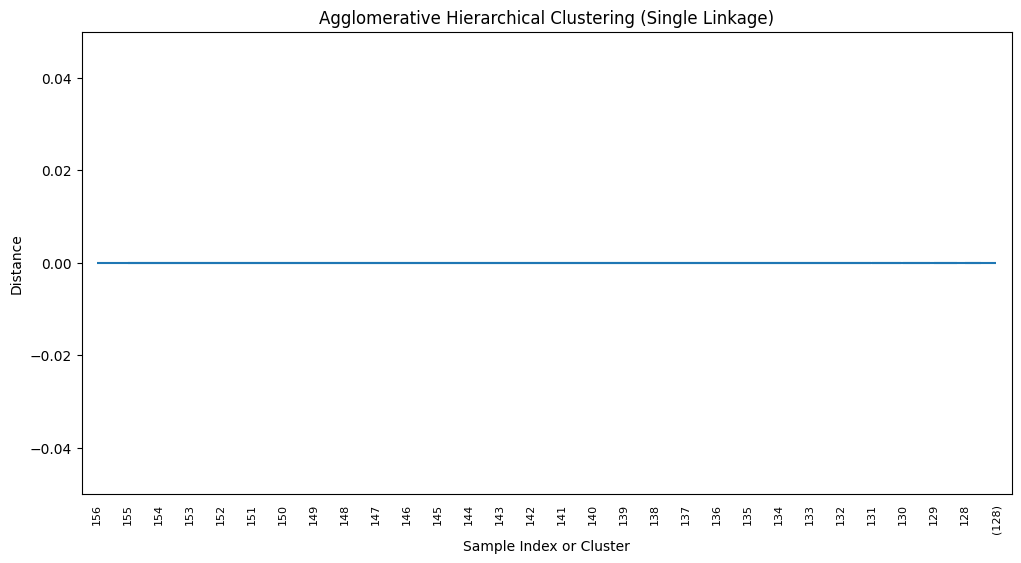

Number of clusters formed with single linkage: 1


/usr/local/lib/python3.12/dist-packages/scipy/cluster/hierarchy.py:2947: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


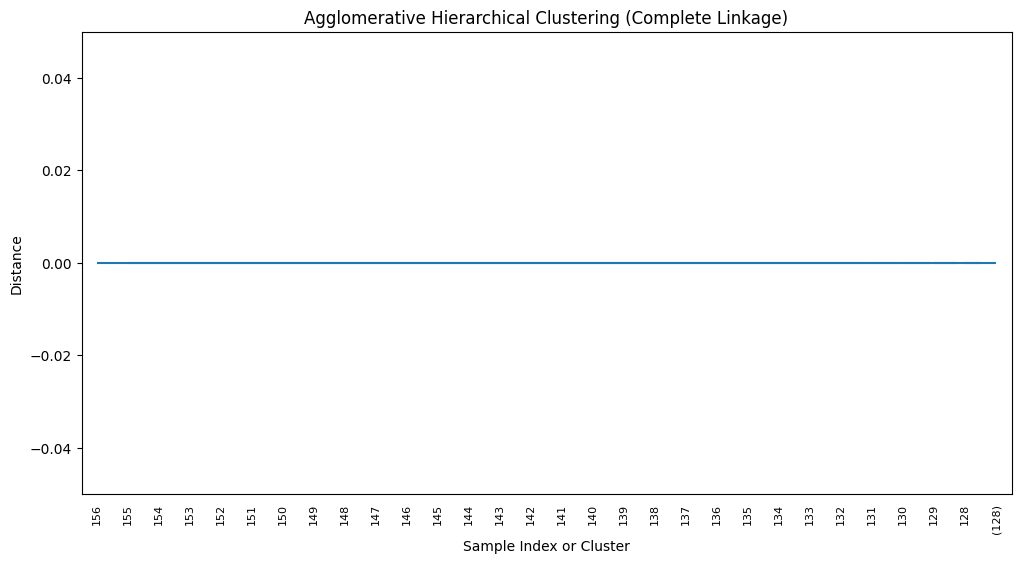

Number of clusters formed with complete linkage: 1


/usr/local/lib/python3.12/dist-packages/scipy/cluster/hierarchy.py:2947: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


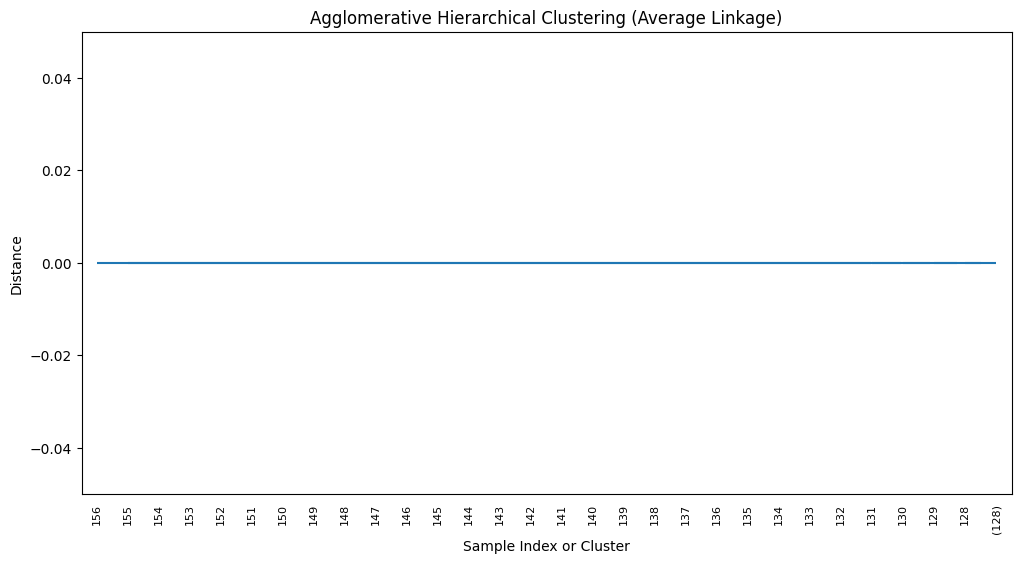

Number of clusters formed with average linkage: 1


In [6]:
linkage_methods = ['single', 'complete', 'average']

for method in linkage_methods:
    # Compute linkage matrix
    Z = linkage(X_scaled, method=method)

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=8.)
    plt.title(f"Agglomerative Hierarchical Clustering ({method.capitalize()} Linkage)")
    plt.xlabel("Sample Index or Cluster")
    plt.ylabel("Distance")
    plt.show()

    # Form clusters (cut tree to create 4 clusters)
    clusters = fcluster(Z, t=4, criterion='maxclust')
    df[f'Cluster_{method}'] = clusters
    print(f"Number of clusters formed with {method} linkage: {len(np.unique(clusters))}")

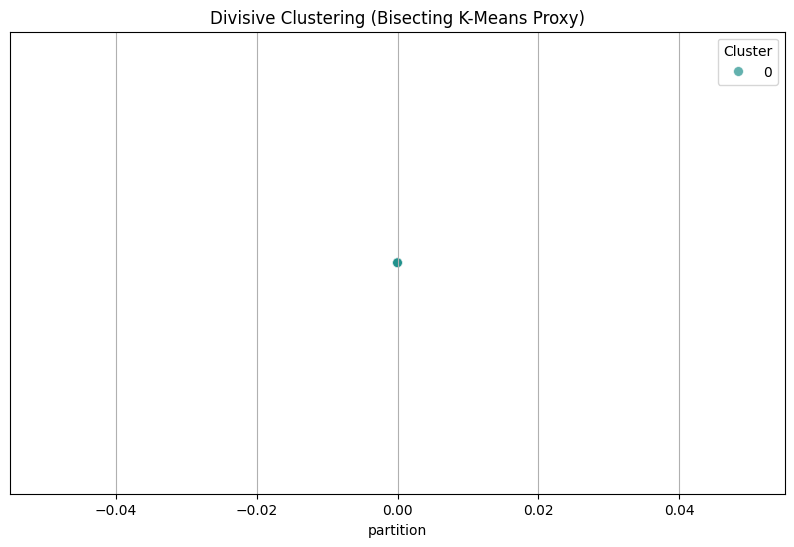

In [10]:
# ------------------------------------------------------------
# 5. Divisive Clustering (using Bisecting K-Means as proxy)
# ------------------------------------------------------------
bisect_kmeans = BisectingKMeans(n_clusters=4, random_state=42)
df['Divisive_Clusters'] = bisect_kmeans.fit_predict(X_scaled)

# ------------------------------------------------------------
# Plot Divisive Clusters
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))

if X.shape[1] >= 2:
    # If at least 2 numeric features exist → regular 2D scatter
    sns.scatterplot(
        data=df,
        x=X.columns[0],
        y=X.columns[1],
        hue='Divisive_Clusters',
        palette='viridis',
        s=50,
        alpha=0.7
    )
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

else:
    # If only 1 numeric feature → 1D visualization
    sns.scatterplot(
        data=df,
        x=X.columns[0],
        y=[0]*len(df),  # dummy y-values
        hue='Divisive_Clusters',
        palette='viridis',
        s=50,
        alpha=0.7
    )
    plt.yticks([])
    plt.ylabel("")

plt.title("Divisive Clustering (Bisecting K-Means Proxy)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [8]:
print("\nSummary:")
print("✔ Agglomerative clustering performed with single, complete, and average linkage methods.")
print("✔ Dendrograms plotted for each linkage method.")
print("✔ Divisive clustering approximated using Bisecting K-Means.")
print(f"✔ Total records processed: {len(df)}")
print(f"✔ Divisive clustering produced {len(np.unique(df['Divisive_Clusters']))} clusters.\n")


Summary:
✔ Agglomerative clustering performed with single, complete, and average linkage methods.
✔ Dendrograms plotted for each linkage method.
✔ Divisive clustering approximated using Bisecting K-Means.
✔ Total records processed: 157
✔ Divisive clustering produced 1 clusters.



In [ ]:

# Drop rows with missing values
df = df.dropna()

# Select only numeric features for clustering (avoid brand/model names)
X = df.select_dtypes(include=['int64', 'float64'])

if X.empty:
    raise ValueError("No numeric columns found for clustering. Please check your dataset.")

print("Numeric columns used for clustering:", X.columns.tolist(), "\n")

# ------------------------------------------------------------
# 3. Standardize features
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------------
# 4. Agglomerative Hierarchical Clustering
# ------------------------------------------------------------
linkage_methods = ['single', 'complete', 'average']

for method in linkage_methods:
    # Compute linkage matrix
    Z = linkage(X_scaled, method=method)

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=8.)
    plt.title(f"Agglomerative Hierarchical Clustering ({method.capitalize()} Linkage)")
    plt.xlabel("Sample Index or Cluster")
    plt.ylabel("Distance")
    plt.show()

    # Form clusters (cut tree to create 4 clusters)
    clusters = fcluster(Z, t=4, criterion='maxclust')
    df[f'Cluster_{method}'] = clusters
    print(f"Number of clusters formed with {method} linkage: {len(np.unique(clusters))}")

# ------------------------------------------------------------
# 5. Divisive Clustering (using Bisecting K-Means as proxy)
# ------------------------------------------------------------
bisect_kmeans = BisectingKMeans(n_clusters=4, random_state=42)
df['Divisive_Clusters'] = bisect_kmeans.fit_predict(X_scaled)

# Plot divisive clusters using first two numeric features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x=X.columns[0],
    y=X.columns[1],
    hue='Divisive_Clusters',
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title("Divisive Clustering (Bisecting K-Means Proxy)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 6. Summary
# ------------------------------------------------------------
print("\nSummary:")
print("✔ Agglomerative clustering performed with single, complete, and average linkage methods.")
print("✔ Dendrograms plotted for each linkage method.")
print("✔ Divisive clustering approximated using Bisecting K-Means.")
print(f"✔ Total records processed: {len(df)}")
print(f"✔ Divisive clustering produced {len(np.unique(df['Divisive_Clusters']))} clusters.\n")